<h1> DATA ANALYSIS with PYTHON</h1>

<h2>Import the Dataset</h2>

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('automobile2.csv', header=0)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,16500.0,Low,0,1,1,0
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0
2,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,9.791667,7.833333,13950.0,Low,0,1,1,0
3,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,13.055556,10.681818,17450.0,Low,0,1,1,0
4,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,110,5500.0,12.368421,9.400000,15250.0,Low,0,1,1,0


<h2> Analyzing Individual Feature Patterns Using Visualization </h2>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<h3>1. Data type</h3>

In [5]:
print(df[['bore','stroke','compression-ratio','horsepower']].dtypes)

bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
dtype: object


<h3>2. Correlation</h3>

In [6]:
print(df[['bore','stroke','compression-ratio','horsepower']].corr())

                       bore    stroke  compression-ratio  horsepower
bore               1.000000 -0.051087           0.002034    0.566807
stroke            -0.051087  1.000000           0.186780    0.100881
compression-ratio  0.002034  0.186780           1.000000   -0.214260
horsepower         0.566807  0.100881          -0.214260    1.000000


<h3>3. Positive Linear Relationship (plot)</h3>

(0.0, 53364.93884891196)

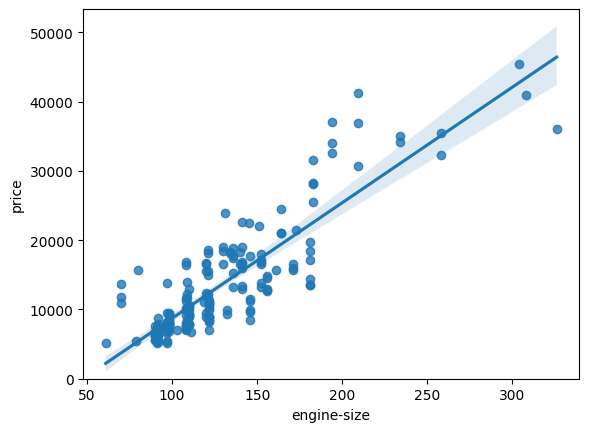

In [7]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [8]:
#engine-size & price correlation
print(df[['engine-size','price']].corr())

             engine-size     price
engine-size     1.000000  0.872337
price           0.872337  1.000000


(0.0, 47711.93605253356)

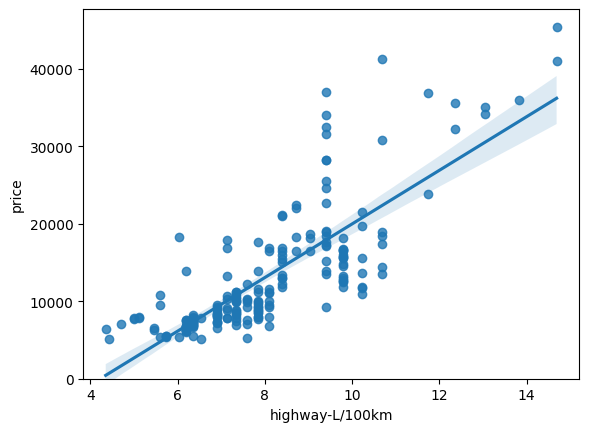

In [9]:
#highway >>> price
sns.regplot(x='highway-L/100km', y='price', data=df)
plt.ylim(0,)

In [10]:
#highway X price correlation
print(df[['highway-L/100km','price']].corr())

                 highway-L/100km     price
highway-L/100km         1.000000  0.801313
price                   0.801313  1.000000


In [11]:
print(df.corr())

                   symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.469772   -0.529145 -0.364511   
normalized-losses   0.469772           1.000000   -0.057068  0.019433   
wheel-base         -0.529145          -0.057068    1.000000  0.879005   
length             -0.364511           0.019433    0.879005  1.000000   
width              -0.237262           0.086961    0.814593  0.857271   
height             -0.542261          -0.377664    0.583789  0.492955   
curb-weight        -0.234743           0.099404    0.787584  0.881058   
engine-size        -0.112069           0.112362    0.576779  0.685531   
bore               -0.145790          -0.029929    0.501576  0.610847   
stroke              0.008072           0.055673    0.144733  0.120929   
compression-ratio  -0.181073          -0.114738    0.249689  0.159203   
horsepower          0.074617           0.217322    0.375610  0.580583   
peak-rpm            0.284033           0.239580   -

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18112\4212406737.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


<h3>4. Weak Linear Relationship </h3>

<Axes: xlabel='peak-rpm', ylabel='price'>

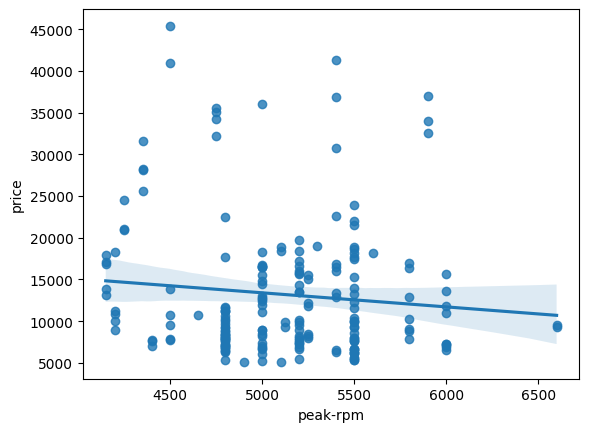

In [12]:
#Peak-rpm X Price

sns.regplot(x="peak-rpm", y="price", data=df)

In [13]:
#CORRELATION
print(df[['peak-rpm','price']].corr())

          peak-rpm     price
peak-rpm  1.000000 -0.101593
price    -0.101593  1.000000


<Axes: xlabel='stroke', ylabel='price'>

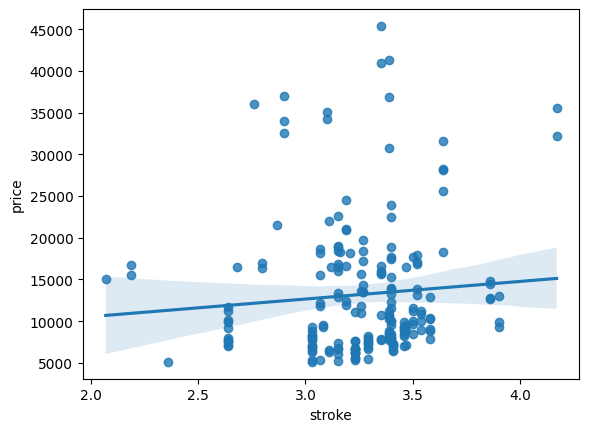

In [14]:
#Stroke X Price
sns.regplot(x='stroke', y='price', data=df)


In [15]:
#Correlation
print(df[['stroke','price']].corr())

          stroke     price
stroke  1.000000  0.083298
price   0.083298  1.000000


<h3>5. Categorical Variables</h3>

<Axes: xlabel='body-style', ylabel='price'>

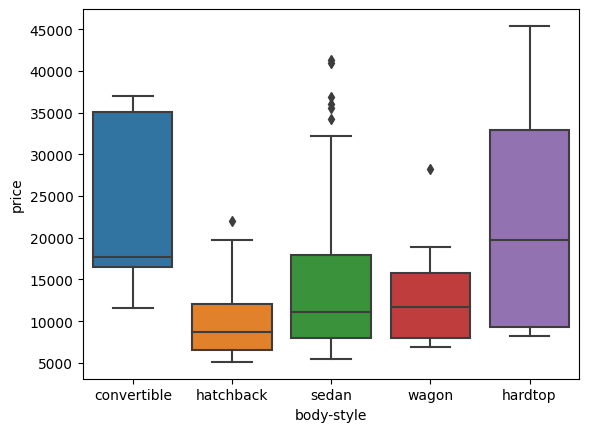

In [16]:
#visualize categorical variables >>> sns.boxplot
#Body Style X Price
sns.boxplot(x='body-style', y='price', data=df)

<Axes: xlabel='engine-location', ylabel='price'>

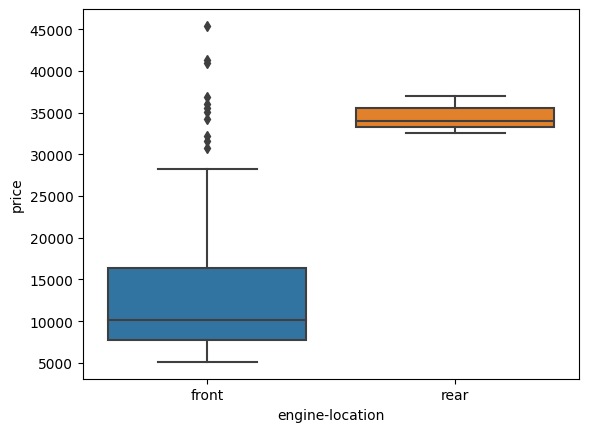

In [17]:
#Engine Location X Price
sns.boxplot(x='engine-location', y='price', data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

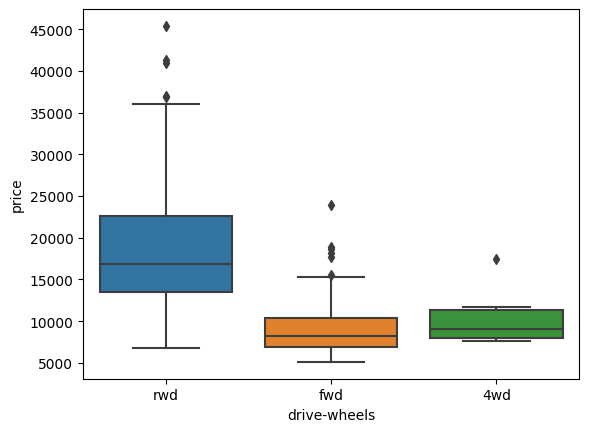

In [18]:
#Drive wheels X Price
sns.boxplot(x='drive-wheels', y='price', data=df)

<h3>6. Descriptive Statistical Analysis</h3>

In [19]:
#Default describe
#skips variable of type object
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,122.000000,98.848000,0.837232,0.915250,0.899523,2555.705000,126.860000,3.329981,3.259816,10.170100,103.365000,5118.259901,9.937914,8.041663,13205.690000,0.100000,0.900000,0.820000,0.180000
std,1.248557,32.076542,6.038261,0.059333,0.029207,0.040610,518.594552,41.650501,0.268562,0.314177,4.014163,37.455525,479.240743,2.539415,1.844764,7966.982558,0.300753,0.300753,0.385152,0.385152
min,-2.000000,65.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,4.351852,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,100.250000,94.500000,0.800937,0.891319,0.869565,2163.000000,97.750000,3.150000,3.117500,8.575000,70.000000,4800.000000,7.833333,6.911765,7775.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5162.995050,9.791667,7.833333,10270.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,138.250000,102.400000,0.881788,0.926042,0.928512,2928.250000,142.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,12.368421,9.400000,16500.750000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,18.076923,14.687500,45400.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
#Describe object data type
df.describe(include='object')

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,200,200,200,200,200,200,200,200,200
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,197,145,156,91,152


<h3>7. Value Counts</h3>

<p>How many units of each attribute we have?</p>

In [21]:
#default
df['drive-wheels'].value_counts()

fwd    118
rwd     74
4wd      8
Name: drive-wheels, dtype: int64

In [22]:
#convert to dataframe
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,74
4wd,8


In [23]:
#convert to dataframe & save it
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,74
4wd,8


In [24]:
#rename it to 'drive_wheels'

drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,74
4wd,8


In [25]:
#Do the same to engine-location
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,197
rear,3


<h3>8. Basics of Grouping</h3>
 
 <p>Group data by different categories, based on 1 or several variables, and analysis is performed on the individual groups.</p>

In [26]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [27]:
#assign attributes into one variable
df_group_one = df[['drive-wheels', 'body-style', 'price']]
df_group_one

,drive-wheels,body-style,price
0,rwd,convertible,16500.0
1,rwd,hatchback,16500.0
2,fwd,sedan,13950.0
3,4wd,sedan,17450.0
4,fwd,sedan,15250.0
...,...,...,...
195,rwd,sedan,16845.0
196,rwd,sedan,19045.0
197,rwd,sedan,21485.0
198,rwd,sedan,22470.0


In [28]:
# Calculate the average price for each of the different categories of data.
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18112\2678944111.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19842.243243


<h4>You can also group by multiple variables</h4>

<p> For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'. </p>

In [29]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


<h4>Visualize it with pivot table</h4>

In [30]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels', columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

fill the missing value with 0

In [31]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                 0.00      0.000000   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

find the average "price" of each car based on "body-style".

In [32]:
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,23569.600000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


Let's use a heat map to visualize the relationship between Body Style vs Price.

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

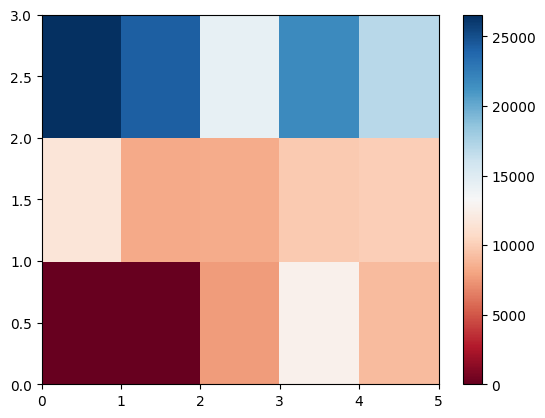

In [33]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

Add some useful information

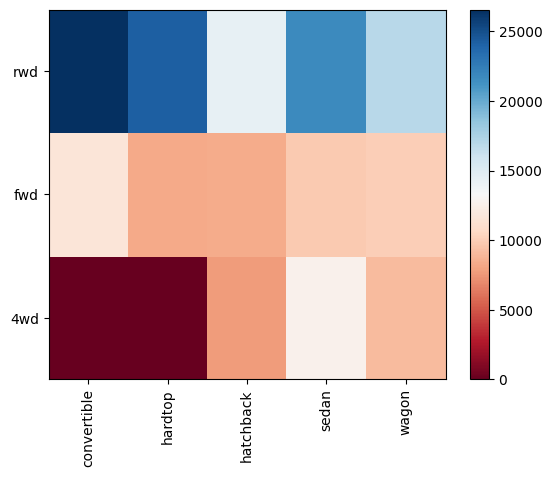

In [34]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h2><b>9. Correlation and Causation</h2>

Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

<h4>a. Pearson Correlation</h4>

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

<br>1: Perfect positive linear correlation.

<br>0: No linear correlation, the two variables most likely do not affect each other.

<br>-1: Perfect negative linear correlation.


<br>
<br>
Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64' variables.

<h3>
command:

df.corr()
</h3>

In [40]:
df.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18112\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.469772,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.145790,0.008072,-0.181073,0.074617,0.284033,0.062423,-0.033159,-0.083327,-0.195381,0.195381,0.050995,-0.050995
normalized-losses,0.469772,1.000000,-0.057068,0.019433,0.086961,-0.377664,0.099404,0.112362,-0.029929,0.055673,-0.114738,0.217322,0.239580,0.238712,0.181247,0.133999,-0.101574,0.101574,0.006915,-0.006915
wheel-base,-0.529145,-0.057068,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.501576,0.144733,0.249689,0.375610,-0.365045,0.484047,0.584953,0.589147,0.306706,-0.306706,-0.254907,0.254907
length,-0.364511,0.019433,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.610847,0.120929,0.159203,0.580583,-0.286688,0.659174,0.708466,0.691044,0.210616,-0.210616,-0.229294,0.229294
width,-0.237262,0.086961,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.548485,0.182864,0.189008,0.617115,-0.247337,0.677111,0.739845,0.752795,0.243448,-0.243448,-0.304459,0.304459
height,-0.542261,-0.377664,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.187917,-0.081103,0.259526,-0.085829,-0.315820,0.008923,0.088903,0.137284,0.281198,-0.281198,-0.086531,0.086531
curb-weight,-0.234743,0.099404,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.644552,0.168669,0.156444,0.758076,-0.279422,0.785868,0.837217,0.834420,0.221082,-0.221082,-0.322097,0.322097
engine-size,-0.112069,0.112362,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.572878,0.208133,0.029005,0.822689,-0.256681,0.745337,0.783593,0.872337,0.070925,-0.070925,-0.110278,0.110278
bore,-0.145790,-0.029929,0.501576,0.610847,0.548485,0.187917,0.644552,0.572878,1.000000,-0.051087,0.002034,0.566807,-0.267061,0.553954,0.558675,0.543433,0.055395,-0.055395,-0.229338,0.229338
stroke,0.008072,0.055673,0.144733,0.120929,0.182864,-0.081103,0.168669,0.208133,-0.051087,1.000000,0.186780,0.100881,-0.066021,0.041310,0.051032,0.083298,0.240046,-0.240046,-0.215805,0.215805


<h4>b. P-value</h4>

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

<br> p-value is < 0.001: we say there is strong evidence that the correlation is significant.

<br> the p-value is < 0.05: there is moderate evidence that the correlation is significant.

<br>the p-value is < 0.1: there is weak evidence that the correlation is significant.

<br>the p-value is > 0.1: there is no evidence that the correlation is significant.

<h3>
We can obtain this information using "stats" module in the "scipy" library.
</h3>

In [41]:
from scipy import stats

<h4><b>Pearson Correlation and P-value of 'Wheel-Base' vs 'Price'</h4>

In [47]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5891470005448702 with a P-value of P = 4.45701950205028e-20


<b>Conclusion:</b>
<p>
Since the p-value is  
<
  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).

<h4><b>Pearson Correlation and P-value of 'Horepower' vs 'Price'</h4>

In [43]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8096565575365613  with a P-value of P =  1.0468839625925992e-47


<b>
Conclusion:</b>
<p>
Since the p-value is  
<
  0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

<h4><b>Pearson Correlation and P-value of 'Length' vs 'Price'</h4>

In [44]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6910440897821903  with a P-value of P =  9.960963222348494e-30


<b>Conclusion:</b>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>


<h4><b>Pearson Correlation and P-value of 'Width' vs 'Price'</h4>

In [48]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.752794863183261  with a P-value of P = 8.256714148308062e-38


<b>Conclusion:</b>

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (\~0.751).


<h4><b>Pearson Correlation and P-value of 'Curb-Weight' vs 'Price'</h4>

In [49]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344204348498461  with a P-value of P =  3.9699775360218265e-53


<b>Conclusion:</b>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>


<h4><b>Pearson Correlation and P-value of 'Engine-Size' vs 'Price'</h4>

In [50]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.872336749852114  with a P-value of P = 1.8977171466564964e-63


<b>Conclusion:</b>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>


<h4><b>Pearson Correlation and P-value of 'Bore' vs 'Price'</h4>

In [51]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5434325935555682  with a P-value of P =   9.2074875241946e-17


<b>Conclusion:</b>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>


<h4><b>Pearson Correlation and P-value of 'City-L/100km' vs 'Price'</h4>

In [53]:
pearson_coef, p_value = stats.pearsonr(df['city-L/100km'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.7902908680181893  with a P-value of P =  5.414138235107299e-44


<h4><b>Pearson Correlation and P-value of 'Highway-L/100km' vs 'Price'</h4>

In [54]:
pearson_coef, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.8013130144661037  with a P-value of P =  4.67904202425645e-46


<h2><b>10. ANOVA</h2>

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>


<h3>Different types of Drive Wheels impact Price</h3>

In [55]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,16500.0
1,rwd,16500.0
2,fwd,13950.0
3,4wd,17450.0
4,fwd,15250.0
135,4wd,7603.0


In [56]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,16500.0
1,rwd,hatchback,16500.0
2,fwd,sedan,13950.0
3,4wd,sedan,17450.0
4,fwd,sedan,15250.0
...,...,...,...
195,rwd,sedan,16845.0
196,rwd,sedan,19045.0
197,rwd,sedan,21485.0
198,rwd,sedan,22470.0


Obtain the values of the method group using the method "get_group".


In [57]:
grouped_test2.get_group('4wd')['price']

3      17450.0
135     7603.0
139     9233.0
140    11259.0
143     8013.0
144    11694.0
149     7898.0
150     8778.0
Name: price, dtype: float64

Use the function 'f_oneway' in the module 'stats' to obtain the <b>F-test score</b> and <b>P-value</b>.

In [59]:
#ANOVA

f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])

In [60]:
#print result

print('ANOVA results: F= ', f_val, ' P= ', p_val)

ANOVA results: F=  68.49603532807176  P=  2.6116313994533828e-23


Large F-test score showing a strong correlation

<br>
P-value of almost 0 implying almost certain statistical significance

<b>Examine Separately</b>

<h2><b>fwd x rwd</h2>

In [62]:
#ANOVA

f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])

#RESULT
print('ANOVA results: F= ', f_val, ' P= ', p_val)

ANOVA results: F=  131.59324661179534  P=  1.7388247444783172e-23


<h2><b>4wd x rwd</h2>

In [63]:
#ANOVA

f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])

#RESULT
print('ANOVA results: F= ', f_val, ' P= ', p_val)

ANOVA results: F=  8.67069478113451  P=  0.004232262975461324


<h2><b>4wd x fwd</h2>

In [64]:
#ANOVA

f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])

#RESULT
print('ANOVA results: F= ', f_val, ' P= ', p_val)

ANOVA results: F=  0.665465750252303  P=  0.4162011669784502
